In [121]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [2]:
df=pd.read_csv('MBG_audiences.csv')
df.head()

,Description,Id,Location,Followers Count,Friends Count,Date Joined,Statuses Count,Language
0,Black woman. Queer. Comedy is an aphrodisiac. ...,1288466505592647680,NaN,5,145,Wed Jul 29 13:28:59 +0000 2020,12,NaN
1,We are growing more than JUST food! Active on:...,1138260140245696512,"Monterey, CA",25,458,Tue Jun 11 01:42:20 +0000 2019,69,NaN
2,=not endorsementAn Ordinary Tax Payer & Respon...,890886953037647872,"Jaipur,Kolkata,India",69,709,Fri Jul 28 10:49:36 +0000 2017,11765,NaN
3,"Good Vibes only for Live by the sun, Love by t...",1071352236083736578,"West Palm Beach, Florida",57,212,Sat Dec 08 10:34:12 +0000 2018,407,NaN
4,"Be silly, be honest, be kind. Whatever you are...",195813235,"Baltimore, MD",28,126,Mon Sep 27 16:53:02 +0000 2010,10,NaN


# lemmization

In [4]:
nltk.download('wordnet')   
# define stop words
nltk.download('stopwords') 
stop_words = set(stopwords.words("english"))

def fix_Text2(text):
    letters_only = re.sub("[^a-zA-Z]"," ", str(text))
    words=letters_only.lower().split()
    meaningful=[WordNetLemmatizer().lemmatize(word) for word in words if word not in stop_words]
    return(" ".join(meaningful))

num_resp = df["Description"].size   #df
clean_description_lemmization = []     #clean_

for i in range(0,num_resp):
    clean_description_lemmization.append(fix_Text2(df["Description"][i])) #clean_

clean_description_lemmization[0:5]    ## clean_

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/qiqintian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/qiqintian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['black woman queer comedy aphrodisiac life full thing never imagined often imagined never realized',
 'growing food active instagram twitter soundcloud',
 'endorsementan ordinary tax payer responsible citizen',
 'good vibe live sun love moon igcluj napoca',
 'silly honest kind whatever good one work hard nice people']

In [5]:
len(clean_description_lemmization)

1000

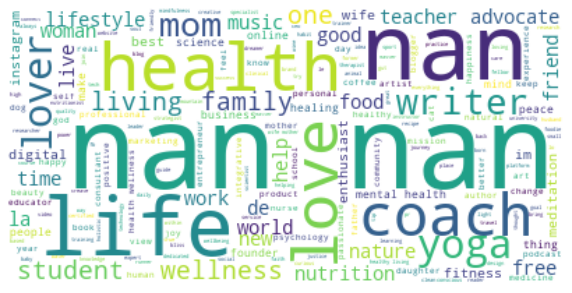

In [7]:
# word cloud
text_wc = " ".join(item for item in clean_description_lemmization)    #clean_
wordcloud = WordCloud(background_color="white").generate(text_wc)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
tv=TfidfVectorizer() 
tv_transform=tv.fit_transform(clean_description_lemmization)
tv_transform.shape

(1000, 2610)

## cluster audiences

In [25]:
from scipy.cluster.vq import kmeans,vq

In [36]:
num_clusters=7  # change the # of clusters
cluster_centers,distortion=kmeans(tv_transform.todense(),num_clusters)

## unigram

In [ ]:
tv=TfidfVectorizer(max_features=100)  # 1.change # of features 2.maybe min_df
tv_transform=tv.fit_transform(clean_description_lemmization)

In [37]:
terms=tv.get_feature_names()
for i in range(num_clusters):
    center_terms=dict(zip(terms,list(cluster_centers[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:3])

['mom', 'wife', 'mother']
['life', 'love', 'live']
['nan', 'advocate', 'art']
['best', 'life', 'live']
['healing', 'lifestyle', 'medium']
['positive', 'student', 'psychology']
['health', 'yoga', 'writer']


## bigram

In [38]:
tv=TfidfVectorizer(max_features=100,ngram_range=(2,2)) 
tv_transform=tv.fit_transform(clean_description_lemmization)

In [39]:
terms=tv.get_feature_names()
for i in range(num_clusters):
    center_terms=dict(zip(terms,list(cluster_centers[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:3])

['music lover', 'wife mother', 'music movie']
['life live', 'love god', 'live healthier']
['non fiction', 'alkaline water', 'always learning']
['black woman', 'life live', 'live healthier']
['helping people', 'lifestyle blogger', 'mind body']
['reiki master', 'travel enthusiast', 'school nurse']
['highest quality', 'yoga teacher', 'yoga instructor']


## unigram & bigram

In [41]:
tv=TfidfVectorizer(max_features=100,ngram_range=(1,2)) 
tv_transform=tv.fit_transform(clean_description_lemmization)

In [43]:
terms=tv.get_feature_names()
for i in range(num_clusters):
    center_terms=dict(zip(terms,list(cluster_centers[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:5])

['mom', 'wellness', 'mother', 'make', 'digital']
['lifestyle', 'lover', 'living', 'love', 'teacher']
['nan', 'advocate', 'artist', 'author', 'based']
['better', 'lifestyle', 'living', 'happy', 'science']
['healthy', 'like', 'mental', 'daughter', 'yoga']
['personal', 'social', 'professional', 'medium', 'lifestyle']
['help', 'yoga', 'world', 'view', 'food']


## Inspect importance

In [47]:
columns=tv.get_feature_names() # feature names
#transform to DF
df_description=pd.DataFrame(tv_transform.toarray(),columns=columns) #df_
# insepct transformation
tv_sum=df_description.sum() #df

In [49]:
tv_sum.sort_values(ascending=False).head(20)

nan          361.000000
life          29.026866
health        22.532868
love          17.275389
yoga          16.679561
living        14.207433
lover         14.078599
coach         13.874648
writer        12.811686
wellness      12.722443
family        11.841154
mom           11.234444
lifestyle     10.921585
de            10.737332
help          10.536882
one           10.339101
free          10.090982
wife          10.016005
student        9.735041
music          9.648793
dtype: float64

In [118]:
df_sum=pd.DataFrame(tv_sum,columns=['importance']).sort_values(by='importance',ascending=False).iloc[1:15]

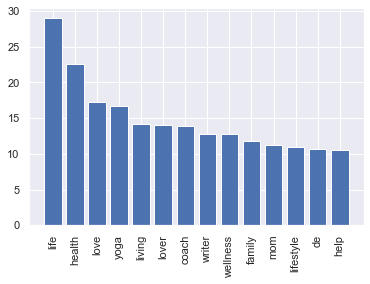

In [123]:
sns.set()
fig,ax=plt.subplots()
ax.bar(df_sum.index,df_sum.importance,label='importance')
ax.set_xticklabels(df_sum.index,rotation=90)
plt.show()

In [ ]:
## use bar chart to visualize each cluster by text importance 

In [90]:
tv_transform.todense().shape

(1000, 100)

In [100]:
pd.DataFrame(zip(terms,list(cluster_centers[1]))).sort_values(by=1,ascending=False)

,0,1
49,lifestyle,0.435307
54,lover,0.233468
52,living,0.084863
53,love,0.048973
89,teacher,0.048839
...,...,...
58,meditation,0.000000
60,mental,0.000000
63,mission,0.000000
65,mother,0.000000
